In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("heart_disease_uci.csv")

# Features and Target
X = df.drop("num", axis=1)
y = df["num"]

# Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate model
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"\n📊 {name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return acc, f1, roc

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Stacking": StackingClassifier(
        estimators=[
            ('lr', LogisticRegression()),
            ('svm', SVC(probability=True)),
            ('rf', RandomForestClassifier(n_estimators=100))
        ],
        final_estimator=LogisticRegression()
    )
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    acc, f1, roc = evaluate_model(model, name)
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1, "ROC-AUC": roc})


result_df = pd.DataFrame(results)
print("\n📈 Summary of Model Performances:")
print(result_df)


plt.figure(figsize=(10, 6))
sns.barplot(data=result_df.melt(id_vars='Model', var_name='Metric', value_name='Score'), x='Model', y='Score', hue='Metric')
plt.title("Comparison of Ensemble Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'heart_disease_uci.csv'

In [ ]:
df= pd.read_csv("heart_disease_uci.csv")
# df1.head()
df.drop(["id", "dataset", "num"], axis=1)
(df["num"] > 0).astype(int)
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("heart_disease_uci.csv")

print("First 5 rows of the dataset:")
print(df.head())

X = df.drop(["id", "dataset", "num"], axis=1)  #
y = (df["num"] > 0).astype(int)
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"\n📊 {name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc:.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return acc, f1, roc

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Stacking": StackingClassifier(
        estimators=[
            ('lr', LogisticRegression()),
            ('svm', SVC(probability=True)),
            ('rf', RandomForestClassifier(n_estimators=100))
        ],
        final_estimator=LogisticRegression()
    )
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    acc, f1, roc = evaluate_model(model, name)
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1, "ROC-AUC": roc})


result_df = pd.DataFrame(results)
print("\n📈 Summary of Model Performances:")
print(result_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=result_df.melt(id_vars='Model', var_name='Metric', value_name='Score'), x='Model', y='Score', hue='Metric')
plt.title("Comparison of Ensemble Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

First 5 rows of the dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4      

ValueError: Input X contains NaN.
AdaBoostClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score


df = pd.read_csv("heart_disease_uci.csv")


y = (df["num"] > 0).astype(int)
X = df.drop(["id", "dataset", "num"], axis=1)

X = pd.get_dummies(X, drop_first=True)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

print("📊 SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


📊 SVM Performance:
Accuracy: 0.86
F1 Score: 0.88
ROC-AUC Score: 0.91
Confusion Matrix:
 [[65 10]
 [16 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        75
           1       0.90      0.85      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



📊 SVM Performance:
Accuracy: 0.86
F1 Score: 0.88
ROC-AUC Score: 0.91
Confusion Matrix:
 [[65 10]
 [16 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        75
           1       0.90      0.85      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


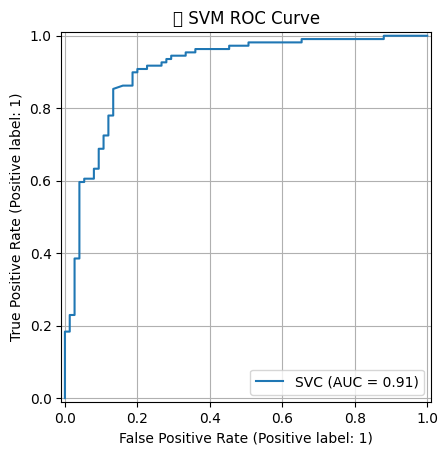

<Figure size 600x500 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


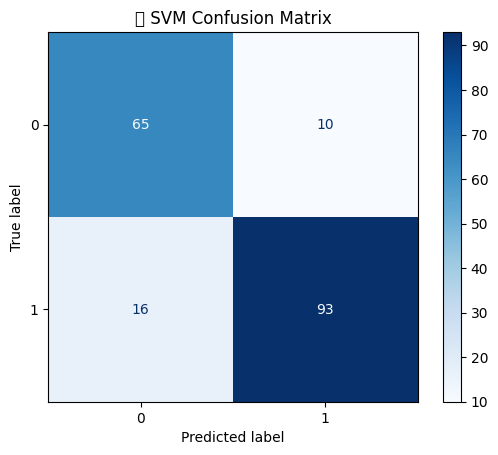

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

df = pd.read_csv("heart_disease_uci.csv")


y = (df["num"] > 0).astype(int)


X = df.drop(["id", "dataset", "num"], axis=1)
X = pd.get_dummies(X, drop_first=True)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay


plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(svm_model, X_test, y_test)
plt.title(" SVM ROC Curve")
plt.grid()
plt.show()

plt.figure(figsize=(6, 5))
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.grid(False)
plt.show()


In [ ]:
import pandas as pd
